# Decision Trees — Classification

Decision Trees are supervised machine learning algorithms used for both regression and classification.

It's powerful because it can handle complex datasets.

In the previous notebook, I worked on predicting continuous values with decision trees (regression).

Here, I am using them for classification — predicting categories.
What I noticed about decision trees:

* No need to scale numerical data.
* Can handle categorical features in raw text (but Scikit-Learn needs preprocessing first).
* Easy to interpret results — not a black-box model.
* Can handle missing values without problems.
* Can handle imbalanced datasets by adjusting class weights.
* Can give feature importance — showing which features matter most.
* Are the base for ensemble methods like Random Forests and Gradient Boosting Machines.

How I understand decision trees work:

Decision trees work like asking a series of if/else questions.
For example: when deciding a car to buy, I check safety first, then number of seats, then number of doors, step by step until I decide the best option.

### Decision Trees — Overfitting

I learned that a well-known downside of decision trees is that they tend to overfit data easily (it’s common to assume they overfit at first).

I can reduce overfitting by limiting the maximum depth of the tree (using the max_depth hyperparameter).

### Contents

* [1 - Imports](#1)
* [2 - Loading the data](#2)
* [3 - Exploratory Analysis](#3)
* [4 - Preprocessing the data](#4)
* [5 - Training Decision Trees](#5)
* [6 - Evaluating Decision Trees](#6)
* [7 - Improving Decision Trees](#7)

<a name='1'></a>
## 1 - Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

<a name='2'></a>

## 2 - Loading the data

In this classification task with decision trees, I'll use a car dataset that is avilable at [OpenML](https://www.openml.org/d/21) to predict the car acceptability given the information about the car. I'll load it with Sklearn `fetch_openml` function.

Here are the informations about the features:

* *buying*: The buying price of the car(vhigh, high, med, low)
* maint: The maintainance price of the car(high, high, med, low)
* *doors*: The number of doors (2,3,4,5more)
* *persons*: The number of persons that can be carried the car. They are 2, 4, and more.
* *lug_boot*: The size of the luggage boot (small, med, big)
* *safety*: Estimated safefy of the car(low, med, high)
* *BinaryClass(target feature)*: The car acceptability class. Either positive(P) or negative(N).

In [2]:
from sklearn.datasets import fetch_openml

car_data = fetch_openml(name='car', version=2)

In [3]:
type(car_data)

sklearn.utils._bunch.Bunch

In [4]:
# displaying feature names
car_data.feature_names

['buying', 'maint', 'doors', 'persons', 'lug_boot', 'safety']

In [5]:
# getting the whole dataframe
car_data = car_data.frame
car_data.head()

,buying,maint,doors,persons,lug_boot,safety,binaryClass
0,vhigh,vhigh,2,2,small,low,P
1,vhigh,vhigh,2,2,small,med,P
2,vhigh,vhigh,2,2,small,high,P
3,vhigh,vhigh,2,2,med,low,P
4,vhigh,vhigh,2,2,med,med,P


In [6]:
type(car_data)

pandas.core.frame.DataFrame

<a name='3'></a>
## 3 - Exploratory Analysis

### Splitting Data into Training and Test sets

In [7]:
from sklearn.model_selection import train_test_split

train_data, test_data = train_test_split(car_data, test_size=0.1, random_state=20)

print('The size of training data is: {} \nThe size of testing data is: {}'.format(len(train_data), len(test_data)))

The size of training data is: 1555 
The size of testing data is: 173


In [8]:
# checking summary statistics
train_data.describe()

,buying,maint,doors,persons,lug_boot,safety,binaryClass
count,1555,1555,1555,1555,1555,1555,1555
unique,4,4,4,3,3,3,2
top,med,low,2,2,med,low,P
freq,402,392,393,521,522,528,1097


In [9]:
# checking missing value
train_data.isnull().sum()

,0
buying,0
maint,0
doors,0
persons,0
lug_boot,0
safety,0
binaryClass,0


### Checking Categorical Features

In [10]:
train_data['buying'].value_counts()

,count
buying,
med,402
vhigh,387
high,385
low,381


<Axes: xlabel='buying', ylabel='count'>

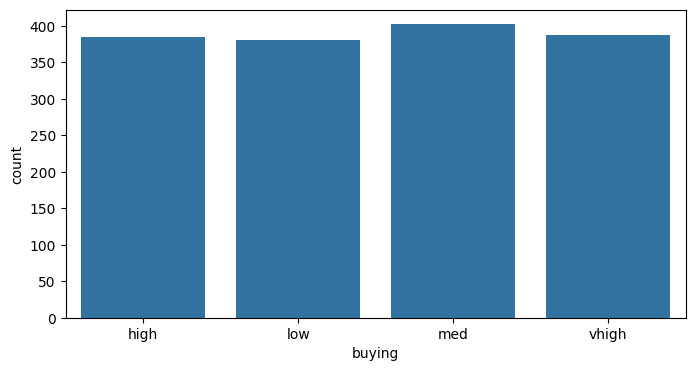

In [11]:
plt.figure(figsize=(8,4))
sns.countplot(data=train_data, x='buying')

<Axes: xlabel='buying', ylabel='count'>

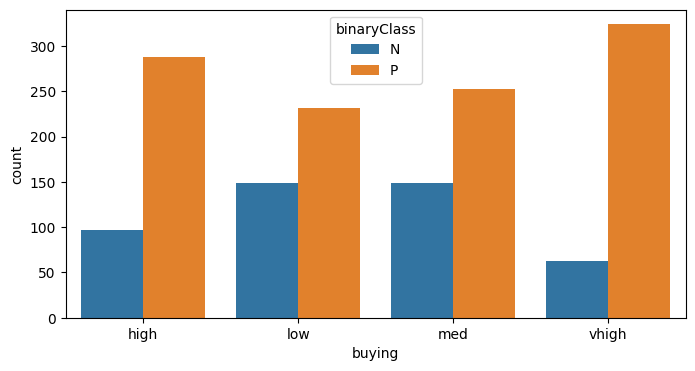

In [12]:
plt.figure(figsize=(8,4))
sns.countplot(data=train_data, x='buying', hue='binaryClass')

The majority class in the buying price is median(`med`).

In [13]:
train_data['maint'].value_counts()

,count
maint,
low,392
med,390
high,387
vhigh,386


<Axes: xlabel='maint', ylabel='count'>

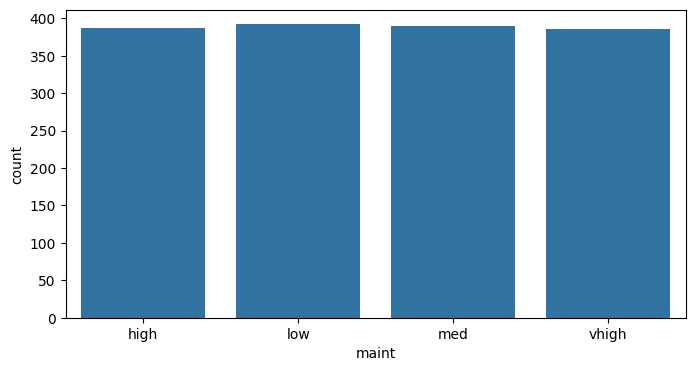

In [14]:
plt.figure(figsize=(8,4))
sns.countplot(data=train_data, x='maint')

<Axes: xlabel='maint', ylabel='count'>

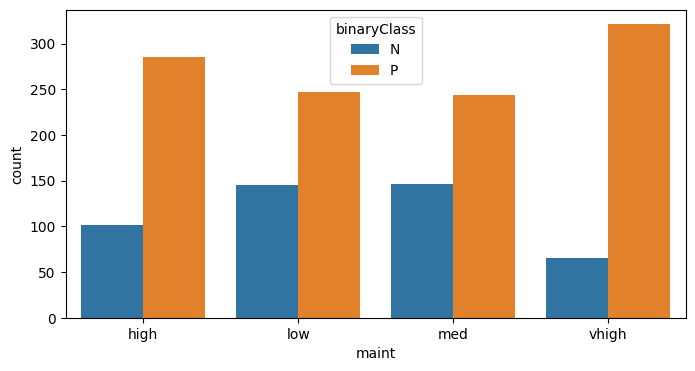

In [15]:
plt.figure(figsize=(8,4))
sns.countplot(data=train_data, x='maint', hue='binaryClass')

In [16]:
train_data['doors'].value_counts()

,count
doors,
2,393
4,393
5more,389
3,380


<Axes: xlabel='doors', ylabel='count'>

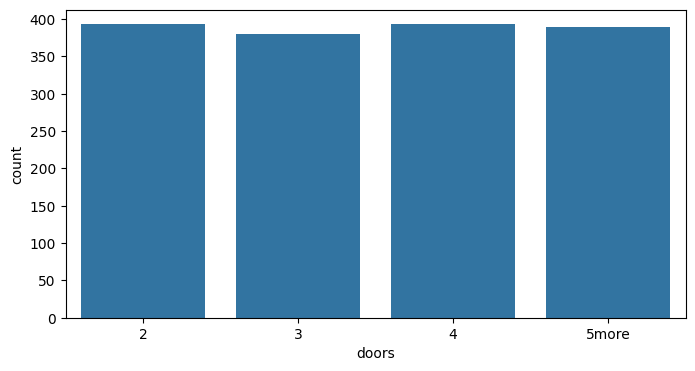

In [17]:
plt.figure(figsize=(8,4))
sns.countplot(data=train_data, x='doors')

<Axes: xlabel='doors', ylabel='count'>

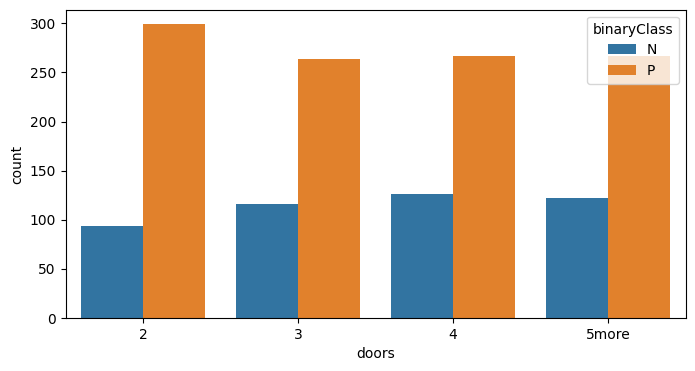

In [18]:
plt.figure(figsize=(8,4))
sns.countplot(data=train_data, x='doors', hue='binaryClass')

Nothing stunning in the maintenance cost. All cars share the same maintenance costs.

In [19]:
train_data['persons'].value_counts()

,count
persons,
2,521
more,521
4,513


<Axes: xlabel='persons', ylabel='count'>

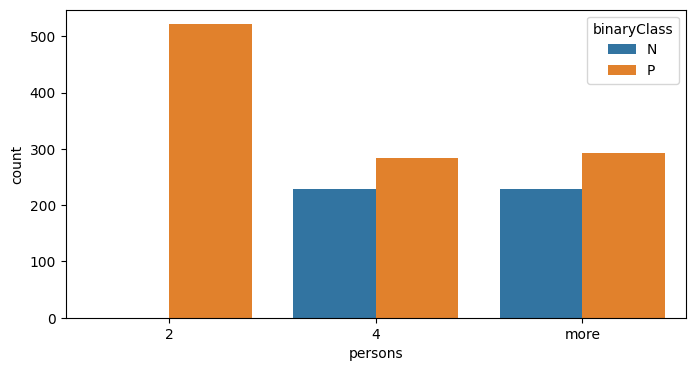

In [20]:
plt.figure(figsize=(8,4))
sns.countplot(data=train_data, x='persons', hue='binaryClass')

In [21]:
train_data['lug_boot'].value_counts()

,count
lug_boot,
med,522
small,517
big,516


<Axes: xlabel='lug_boot', ylabel='count'>

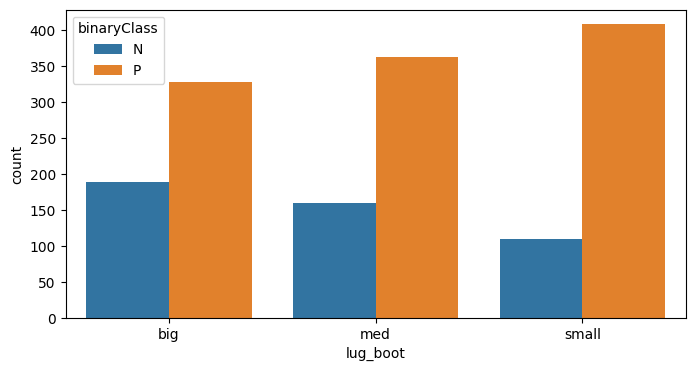

In [22]:
plt.figure(figsize=(8,4))
sns.countplot(data=train_data, x='lug_boot', hue='binaryClass')

In [23]:
train_data['safety'].value_counts()

,count
safety,
low,528
high,514
med,513


<Axes: xlabel='safety', ylabel='count'>

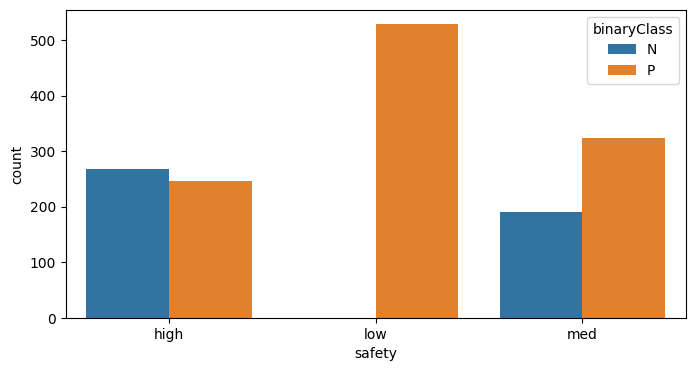

In [24]:
plt.figure(figsize=(8,4))
sns.countplot(data=train_data, x='safety', hue='binaryClass')

In [25]:
train_data['binaryClass'].value_counts()

,count
binaryClass,
P,1097
N,458


<Axes: xlabel='binaryClass', ylabel='count'>

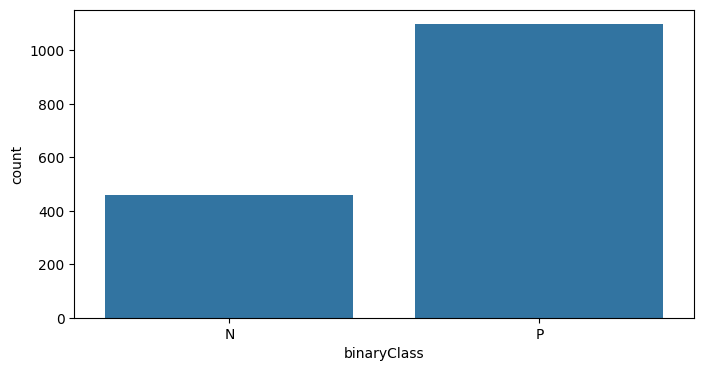

In [26]:
plt.figure(figsize=(8,4))
sns.countplot(data=train_data, x='binaryClass')

Data is clearly skewed / imbalanced — the positive examples are about twice as many as the negative examples.

This means accuracy is not the best metric to evaluate the model here.

In real-world datasets, imbalance and missing values are common.
The important thing is to find effective ways to handle these issues.

For this reason, I will avoid relying only on accuracy for model evaluation.

<a name='4'></a>

## 4 - Data Preprocessing

### Handling Categorical Features

Decision trees don't care if the features are scaled or not, and they can handle the categorical features. The sklearn tree implementation doesn't support categorical features, so I will go ahead and handle them.

### Training input data and labels

In [27]:
car_train = train_data.drop('binaryClass', axis=1)
car_test = train_data[['binaryClass']]

### Creating a pipeline to encode all features in the training input data.

In [28]:
from sklearn.preprocessing import OrdinalEncoder
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ('ord_enc',OrdinalEncoder())
])

car_train_prepared = pipe.fit_transform(car_train)

I'm gonna handle labels. Labels contain P and N, so I want to convert those into numbers. Here instead of using Ordinary Encoder, I will use Label Encoder. Scikit-learn clearly says it’s used to convert target features into numbers.

In [29]:
from sklearn.preprocessing import LabelEncoder

label_enc = LabelEncoder()
car_labels_prepared = label_enc.fit_transform(car_test)

/usr/local/lib/python3.12/dist-packages/sklearn/preprocessing/_label.py:110: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


<a name='5'></a>

## 5 - Training Decision Tree Classifier

In [30]:
from sklearn.tree import DecisionTreeClassifier

tree_clf = DecisionTreeClassifier()

tree_clf.fit(car_train_prepared, car_labels_prepared)

DecisionTreeClassifier()

<a name='6'></a>

## 6 - Evaluating Decision Trees

I'm gonna display accuracy, confusion matrix, and classification report. Classification report contains all useful metrics such as precision, recall, and f1 score.

In [31]:
preds = tree_clf.predict(car_train_prepared)

In [32]:
# Accuracy Score
from sklearn.metrics import accuracy_score

accuracy_score(car_labels_prepared, preds)

1.0

In [33]:
# Confusion Matrix
from sklearn.metrics import confusion_matrix

confusion_matrix(car_labels_prepared, preds)

array([[ 458,    0],
       [   0, 1097]])

In [34]:
# Classification Report
from sklearn.metrics import classification_report

classification_report(car_labels_prepared, preds)

'              precision    recall  f1-score   support\n\n           0       1.00      1.00      1.00       458\n           1       1.00      1.00      1.00      1097\n\n    accuracy                           1.00      1555\n   macro avg       1.00      1.00      1.00      1555\nweighted avg       1.00      1.00      1.00      1555\n'

The model clearly overfitted the data. Let's see how I can regularize it.

<a name='7'></a>

## 7 - Improving Decision Trees

# Cell 1 — Checking current parameters

In [35]:
# Checking current parameters of the Decision Tree Classifier
tree_clf.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'monotonic_cst': None,
 'random_state': None,
 'splitter': 'best'}

### Cell 2 — Setup hyperparameter search

In [36]:
# Importing required library for GridSearch
from sklearn.model_selection import GridSearchCV
import warnings
warnings.filterwarnings('ignore')

# Set hyperparameter grid
params_grid = {
    'max_leaf_nodes': list(range(1, 6)),
    'min_samples_split': [2, 3, 4],
    'min_samples_leaf': [1, 2, 3],
    'max_depth': [1, 2, 3, 4],
    'max_features': [1, 2, 3]
}


### Cell 3 — GridSearch for best parameters

In [37]:
# Run GridSearchCV to find best parameters
grid_search = GridSearchCV(
    DecisionTreeClassifier(random_state=42, class_weight='balanced'),
    params_grid,
    verbose=1,
    cv=3,
    refit=True
)

grid_search.fit(car_train_prepared, car_labels_prepared)

# Show best parameters
grid_search.best_params_


Fitting 3 folds for each of 540 candidates, totalling 1620 fits


{'max_depth': 2,
 'max_features': 3,
 'max_leaf_nodes': 3,
 'min_samples_leaf': 1,
 'min_samples_split': 2}

### Cell 4 — Train best model

In [38]:
# Store best estimator
tree_best = grid_search.best_estimator_

### Cell 5 — Visualize tree

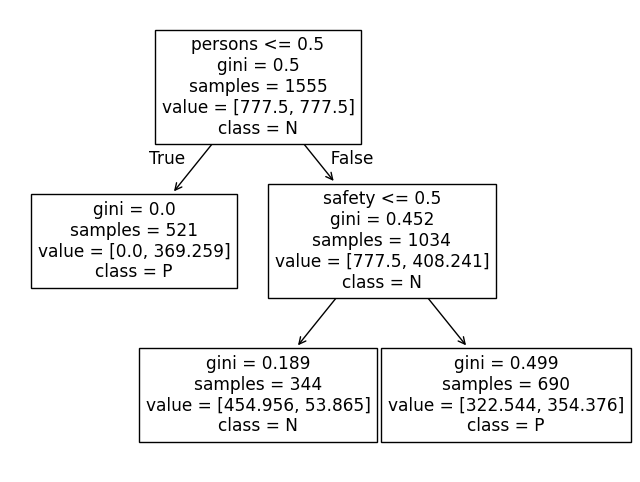

In [39]:
from sklearn.tree import plot_tree

plt.figure(figsize=(8, 6))
plot_tree(tree_best, feature_names=car_train.columns, class_names=['N', 'P'])
plt.show()

### Cell 6 — Evaluate on training set

In [40]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Accuracy on training set
print("Train Accuracy:", accuracy_score(car_labels_prepared, tree_best.predict(car_train_prepared)))

# Confusion matrix for training set
print("Train Confusion Matrix:\n", confusion_matrix(car_labels_prepared, tree_best.predict(car_train_prepared)))

# Classification report for training set
print("Train Classification Report:\n", classification_report(car_labels_prepared, tree_best.predict(car_train_prepared)))

Train Accuracy: 0.8289389067524116
Train Confusion Matrix:
 [[ 268  190]
 [  76 1021]]
Train Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.59      0.67       458
           1       0.84      0.93      0.88      1097

    accuracy                           0.83      1555
   macro avg       0.81      0.76      0.78      1555
weighted avg       0.82      0.83      0.82      1555



### Cell 7 — Preparing test data

In [41]:
# Separating test features and labels
car_test = test_data.drop('binaryClass', axis=1)
car_test_labels = test_data['binaryClass']

# Applying same preprocessing pipeline
car_test_prepared = pipe.transform(car_test)

# Encoding test labels
car_test_labels_prepared = label_enc.transform(car_test_labels)

### Cell 8 — Evaluating on test set

In [42]:
# Accuracy on test set
print("Test Accuracy:", accuracy_score(car_test_labels_prepared, tree_best.predict(car_test_prepared)))

# Confusion matrix for test set
print("Test Confusion Matrix:\n", confusion_matrix(car_test_labels_prepared, tree_best.predict(car_test_prepared)))

# Classification report for test set
print("Test Classification Report:\n", classification_report(car_test_labels_prepared, tree_best.predict(car_test_prepared)))

Test Accuracy: 0.7803468208092486
Test Confusion Matrix:
 [[ 31  29]
 [  9 104]]
Test Classification Report:
               precision    recall  f1-score   support

           0       0.78      0.52      0.62        60
           1       0.78      0.92      0.85       113

    accuracy                           0.78       173
   macro avg       0.78      0.72      0.73       173
weighted avg       0.78      0.78      0.77       173



In [43]:
# The tuned model handles imbalanced data well
# Precision and recall are both good
# Avoiding overfitting made the model generalize well